<a href="https://colab.research.google.com/github/IlhamMaulanaRosyid/Cnn-Bear-and-Panda/blob/main/Image_panda_and_bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
base_dir= '/content/drive/MyDrive/Image Classification/PandasBears'
!ls "/content/drive/MyDrive/Image Classification/PandasBears"

Test  Train  Validation


In [ ]:
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Train')
validation_dr = os.path.join(base_dir, 'Validation')

In [ ]:
bear_dir = os.path.join(train_dir, 'Bears/')
panda_dir = os.path.join(train_dir, 'Pandas/')

print("Jumlah Data Gambar Train")
print('Bears:', len(os.listdir(bear_dir)))
print('Pandas:', len(os.listdir(panda_dir)))


Jumlah Data Gambar Train
Bears: 250
Pandas: 250


In [ ]:
train_bear = os.path.join(train_dir, 'Bears/')
train_panda = os.path.join(train_dir, 'Pandas/')

#test_bear = os.path.join(test_dir, 'Bears/')
#test_panda = os.path.join(test_dir, 'Pandas/')

validation_bear = os.path.join(validation_dr, 'Bears/')
validation_panda = os.path.join(validation_dr, 'Pandas/')

In [ ]:
print('Jumlah All Panda :', len(os.listdir(panda_dir)))
print('Jumlah Train Panda :', len(os.listdir(train_panda)))



Jumlah All Panda : 250
Jumlah Train Panda : 250


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.3,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.3,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))

val_generator = val_datagen.flow_from_directory(test_dir,
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))




Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99) :
      print("\nAkurasi Mencapai 99%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.6263 - loss: 0.6794 - val_accuracy: 0.3000 - val_loss: 1.5726
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.5495 - loss: 0.7586 - val_accuracy: 0.5000 - val_loss: 1.2213
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.7200 - loss: 0.5020 - val_accuracy: 0.0000e+00 - val_loss: 1.9441
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.9490 - loss: 0.2026 - val_accuracy: 0.0000e+00 - val_loss: 4.7670
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.8725 - loss: 0.2092 - val_accuracy: 0.1000 - val_loss: 6.2936
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.9287 - loss: 0.2030 - val_accuracy: 0.6000 - val_loss: 3.7644
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.8653 - loss: 0.2655 - val_accuracy: 0.0000e+00 - val_loss: 6.2512
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9000 - loss: 0.0737 - val_accuracy: 0.1000 

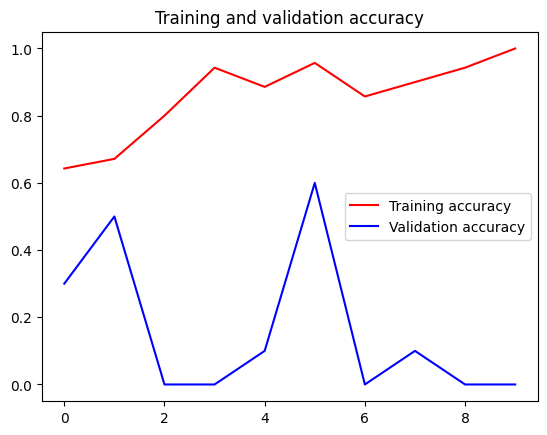

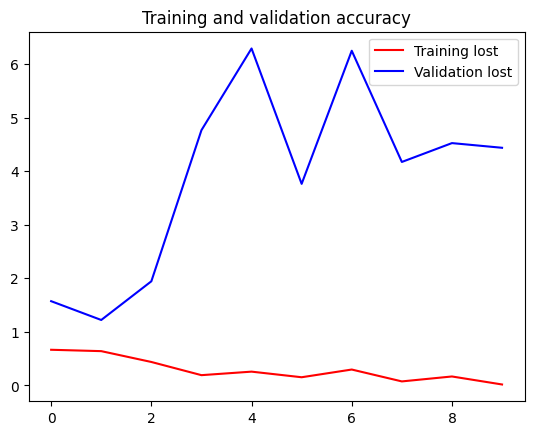

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training lost')
plt.plot(epochs, val_loss, 'b', label='Validation lost')
plt.title('Training and validation accuracy')
plt.legend(loc= 'best')
plt.show()

Saving 251.jpeg to 251 (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
251 (2).jpeg
Gambarini adalah Bears


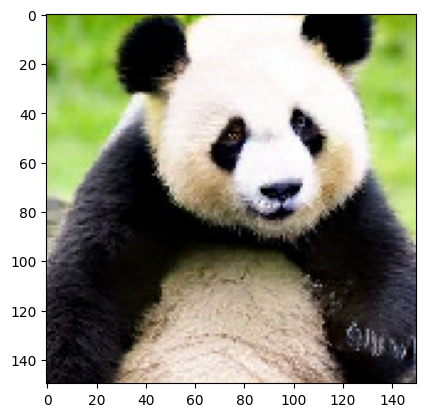

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
   if classes[0][j] == 1:
    print('Gambarini adalah', class_list[j-1])
    break
